# Workshop name

**Author:** Martin Beneš, Verena Lachner

<div style="text-align: center">
<img src="https://www.uibk.ac.at/media/filer_public/00/c3/00c369ba-9e7a-42a4-9f73-466c81dc951a/universitaet-innsbruck-logo-cmyk-farbe.jpg" style="height: 5em; display: inline; padding-right: 2em" />
<img src="https://www.uncoverproject.eu/wp-content/uploads/2021/05/UNCOVER-Logog-440x92.5-final-1.0.png" style="height: 4em; display: inline; padding-left: 2em" />
</div>

<div style="text-align: center">
<a href="https://www.github.com/uibk-uncover/mip-stego-demo">
github.com/uibk-uncover/mip-stego-demo
</a>
</div>

## Notebook setup

For this notebook, we will use a sample image `00001.tif` from ALASKA database. Run following code chunk to download it.

In [3]:
# download 00001.tif from ALASKA website
import requests
res = requests.get('http://alaska.utt.fr/DATASETS/ALASKA_v2_TIFF_512_COLOR/00001.tif', verify=False)
with open('00001.tif', 'wb') as f:
    f.write(res.content)
assert res.status_code == 200, res.text

/opt/miniconda3/envs/dev/lib/python3.9/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alaska.utt.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [139]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.stats
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(threshold=99)
plt.rcParams["figure.figsize"] = (12, 4)
#
im = Image.open('../img/girls.jpeg')  # load image
x = np.array(im.convert('L'))  # PIL to numpy

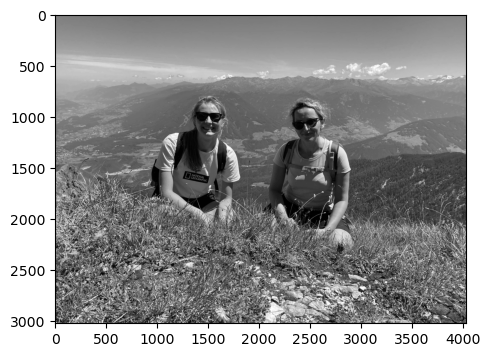

In [50]:
plt.imshow(x,cmap = "gray");

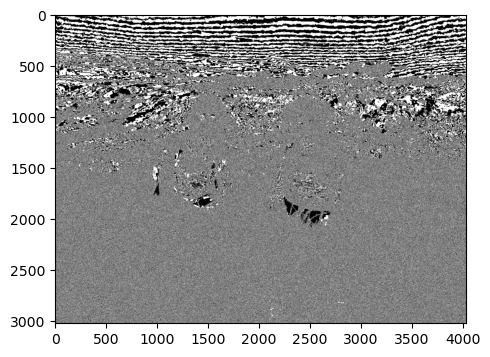

In [45]:
plt.imshow(x & 2,cmap = "gray");

In [46]:
def lsbr(x: np.ndarray, alpha: float = 1., method: str = 'permuted', seed: int = 12345) -> np.ndarray:
    """"""
    # probability
    if method == 'sequential':
        payload = int(np.ceil(alpha * x.size))
        probability = np.reshape([1/2.]*payload + [0]*(x.size - payload), x.shape)
    elif method == 'permuted':
        probability = np.ones(x.shape, dtype='float64') * alpha / e
    else:
        raise NotImplementedError(f'unknown method {method}')
    # simulate
    rng = np.random.default_rng(seed)
    to_be_changed = rng.random(x.shape) < probability
    # modify
    y = np.copy(x)
    y[to_be_changed & (x % 2 == 0)] += 1
    y[to_be_changed & (x % 2 != 0)] -= 1
    return y

## Histogram

We have a basketball "free throw" competition: who scores higher on 255 trials. We look at the "theoretical" distribution for a player with $50:50$ chance.

In [149]:
trials = np.arange(256)  # 255 throws
dis0_5 = scipy.stats.binom.pmf(trials, 255, .5)  # score probabilities at 50:50

We show this distribution as a barchart.

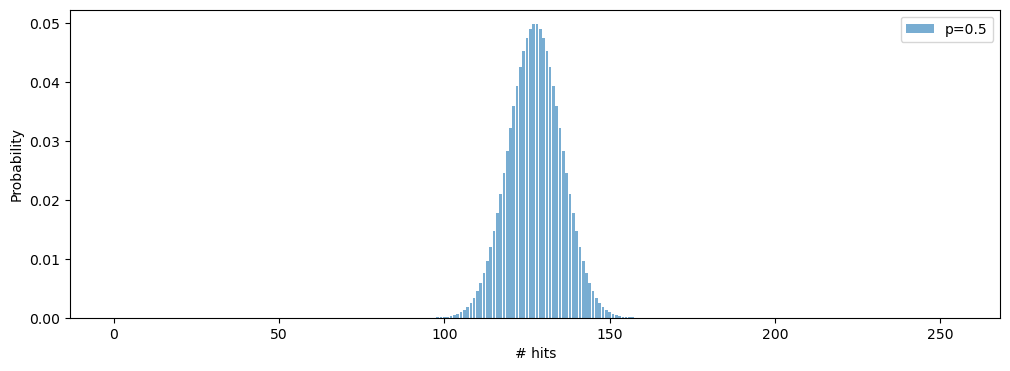

In [151]:
plt.bar(trials, dis0_5, alpha=.6, label='p=0.5');
plt.xlabel('# hits'); plt.ylabel('Probability'); plt.legend();

We add a second, slightly better player with $51:49$ chance of scoring.

In [163]:
dis0_51 = scipy.stats.binom.pmf(trials, 255, .51)  # score probabilities at 51:49

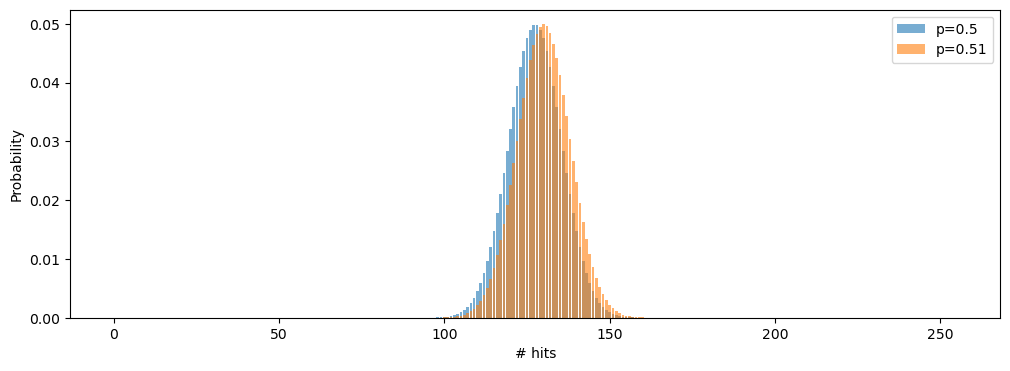

In [164]:
plt.bar(trials, dis0_5, alpha=.6, label='p=0.5');
plt.bar(trials, dis0_51, alpha=.6, label='p=0.51');
plt.xlabel('# hits'); plt.ylabel('Probability'); plt.legend();

It is visible from the barchart, that the orange curve is slightly higher than the blue one.

Usually we do not know the score of the players exactly. We can let them play for some time (e.g., $300$ throws each), and then compare the results.

In [182]:
sample0_5 = scipy.stats.binom.rvs(255, .5, size=500, random_state=42)
sample0_5

array([123, 130, 116, ..., 132, 133, 131])

In [183]:
sample0_51 = scipy.stats.binom.rvs(255, .51, size=500, random_state=42)
sample0_51

array([135, 128, 142, ..., 129, 126, 118])

We visualize the results as a histogram.

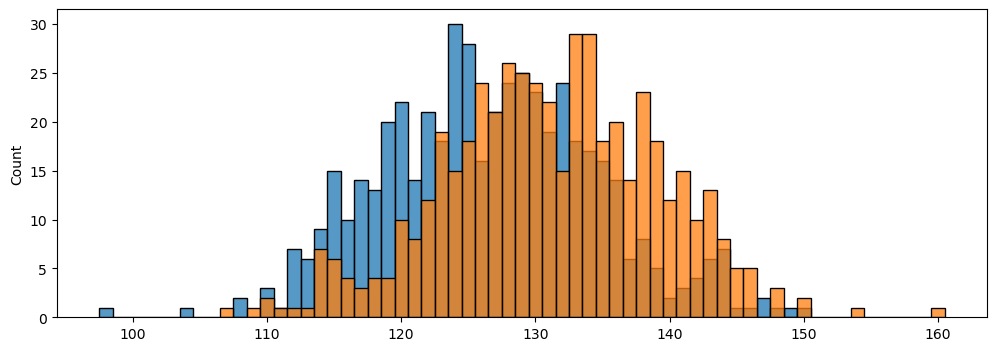

In [184]:
sns.histplot(sample0_5, discrete=True);
sns.histplot(sample0_51, discrete=True);

Is the orange player playing differently than the blue player? It is not clear now. We can test our hypothesis by a statistical tool "hypothesis testing".

One test we can use is $\chi^2$ test, which compares the shapes of the distributions.

In [190]:
scipy.stats.chisquare(sample0_51, sample0_5)

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.03614838699479982

In [ ]:
np.random.seed(12345)  # for reproducibility
colors = np.random.randint(256, size=[10**6])  # draw 1e6 colors with replacement
colors  # print result

We have bag of balls with numbers $0$-$255$. We randomly draw $1000000$ balls with replacement: drawing one at the time, and returning it back before the next draw.

In [56]:
np.random.seed(12345)  # for reproducibility
colors = np.random.randint(256, size=[10**6])  # draw 1e6 colors with replacement
colors  # print result

array([226, 229,  29, ..., 186, 106, 165])

We can analyze the "distribution" of the draws by visualizing their histogram.

/opt/miniconda3/envs/dev/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


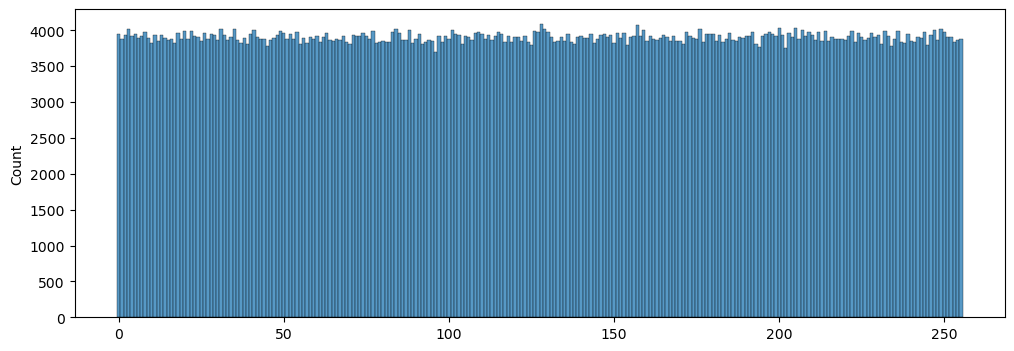

In [57]:
sns.histplot(colors, discrete=True);  # plot result as histogram

The histogram has a rectangular shape. This is called "uniform distribution".

In [58]:
1/256*1e6

3906.25

1000 people tosses 100 times a coin, and count heads.

In [22]:
np.random.seed(12345)  # for reproducibility
tosses = np.random.randint(2, size=[1000, 100])  # toss
toss_sums = np.sum(tosses, axis=1)  # count heads
toss_sums  # print result

array([56, 50, 46, ..., 51, 44, 51])

For a fair coin, we expect the sum to be around $50$.

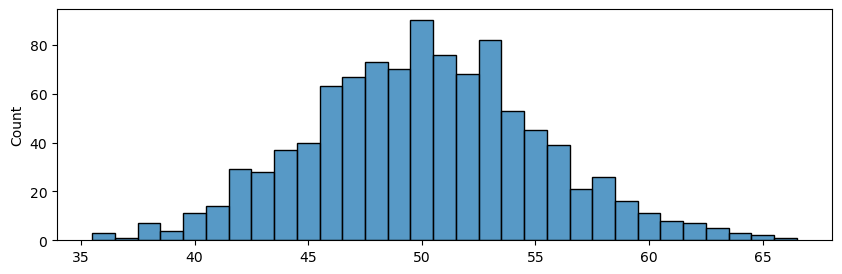

In [231]:
sns.histplot(toss_sums, discrete=True);  # plot result as histogram

## Image histogram

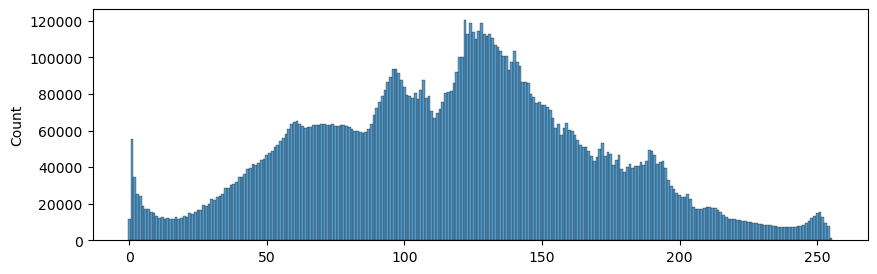

In [215]:
sns.histplot(x.flatten(), discrete=True);

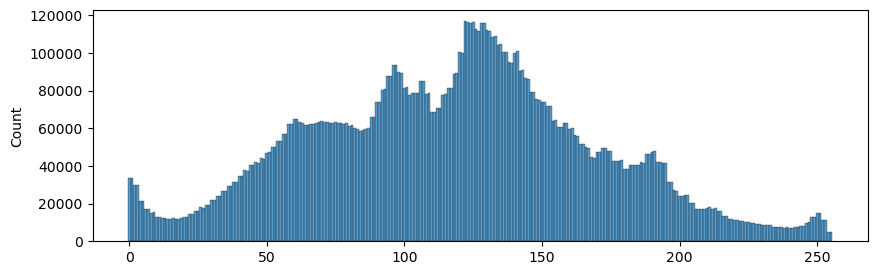

In [216]:
sns.histplot(lsbr_permuted(x, 1.).flatten(), discrete=True);

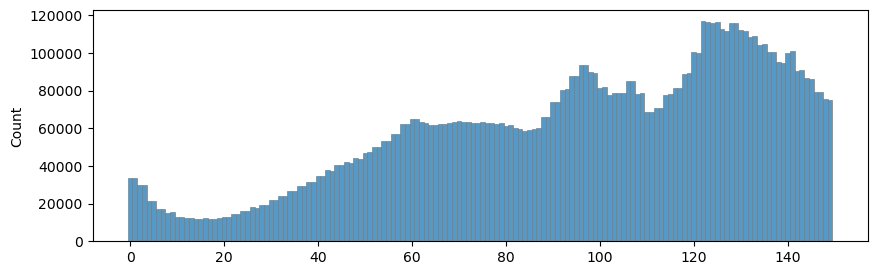

In [250]:
sns.histplot(lsbr_permuted(x, 1.).flatten(), binrange=(0-.5, 150-.5), binwidth=1.);

LSBr averages two neighbors (even and odd), s.t.,

$$\bar{h}_i=\frac{h_{i}+h_{i+1}}{2}$$

We can use Pearson's $\chi^2$ test to compare the bins to their average.

$$S=\frac{(h_0-\bar{h}_0)^2}{\bar{h}_0}+\dots+\frac{(h_{254}-\bar{h}_{254})^2}{\bar{h}_{254}}=\sum_{i=0}^{254}\frac{(h_i-\bar{h}_i)^2}{\bar{h}_i}$$

In [273]:
from scipy.stats import chi2
def attack(x):
    # Calculate the histogram
    h = np.histogram(x.flatten(), bins=255, range=(0,255))[0]

    # Construct even-odd histogram bin pairs
    hbar = (h[:-1] + h[1:]) / 2

    # Chi2 test
    S = np.sum((h[:-1:2] - hbar[::2])**2 / (hbar[::2] + 1e-18))
    pval = chi2.cdf(S, h.size-1)
    return 1 - pval

In [189]:
attack(x)

0.0

In [190]:
import stegolab2 as sl2
y = x + sl2.lsb.simulate(x, .5, seed=12345)
attack(y)

0.8352630752181873

## LSBr leaves traces

LSBr leaves traces.

In [5]:
#
alpha = 1.
e = 2  # efficiency; because every other pixel is changed

In [14]:
#
payload = int(np.ceil(alpha * x.size))
probability = np.reshape([1/e]*payload + [0]*(x.size - payload), x.shape)
rng = np.random.default_rng(12345)
to_be_changed = rng.random(x.shape) < probability
print('Relative payload:', alpha)
print('Change rate:', np.mean(to_be_changed))

# modify
y = x.copy()
y[to_be_changed & (x % 2 == 0)] += 1
y[to_be_changed & (x % 2 != 0)] -= 1

Relative payload: 1.0
Change rate: 0.4995994567871094


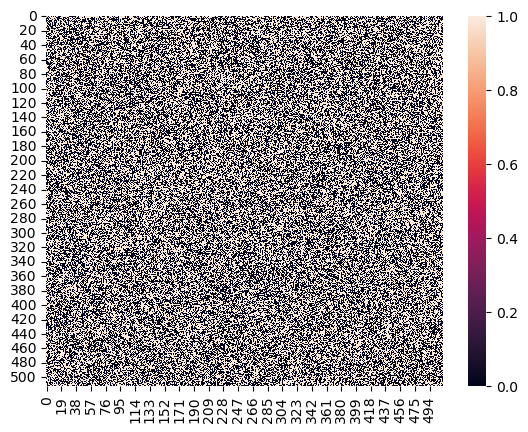

In [15]:
sns.heatmap(np.abs(y.astype('int') - x));

In [16]:
#
probability = np.ones(x.shape, dtype='float64') * alpha / e
rng = np.random.default_rng(12345)
to_be_changed = rng.random(x.shape) < probability
print('Relative payload:', alpha)
print('Change rate:', np.mean(to_be_changed))

# modify
y = x.copy()
y[to_be_changed & (x % 2 == 0)] += 1
y[to_be_changed & (x % 2 != 0)] -= 1

Relative payload: 1.0
Change rate: 0.4995994567871094


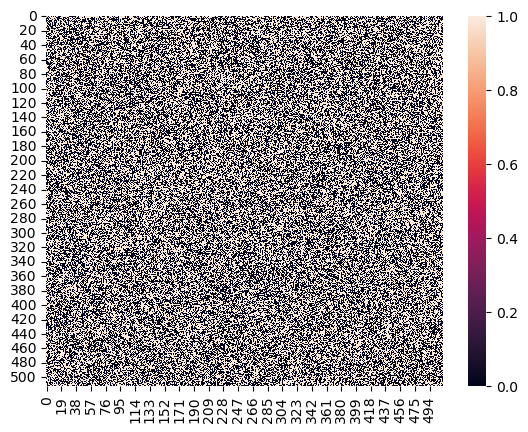

In [17]:
sns.heatmap(np.abs(y.astype('int') - x));

## We compare the histograms

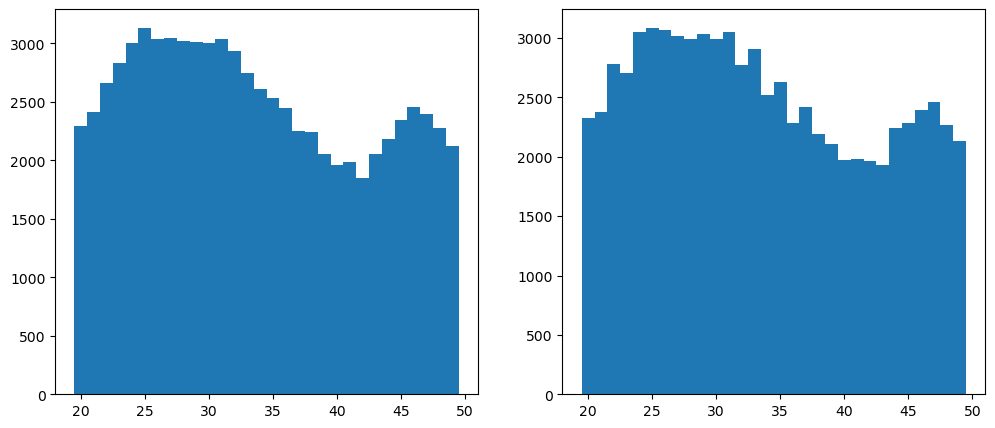

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))
start, end = 20, 50
ax[0].hist(x.flatten(), bins=end-start, range=(start-.5, end-.5));
ax[1].hist(y.flatten(), bins=end-start, range=(start-.5, end-.5));